# CUSTOMER CHURN PREDICTION

### Problem Statement

#### The goal of this project is to develop a classification model that predicts whether a customer will churn. Using demographic data (such as gender, senior citizen status, and tenure) and information about the services they use (such as internet service, phone service, and online security), the model will identify customers at high risk of churning.

#### By accurately predicting churn, the company can proactively design retention strategies to improve customer satisfaction and reduce financial loss. The model’s performance will be evaluated using metrics such as accuracy, precision, recall, and F1 score to ensure balanced and reliable predictions.

## Importing required modules

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

## Performing Exploratory Data Analysis(EDA) 

#### Load the dataset

In [9]:
df = pd.read_csv('customer.csv')

#### Basic overview of dataset

In [21]:
df.shape

(7043, 21)

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [37]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### Numerical summaries of dataset

In [27]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#### Categorical summaries of dataset

In [42]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())


Column: customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Column: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Column: Partner
Partner
No     3641
Yes    3402
Name: count, dtype: int64

Column: Dependents
Dependents
No     4933
Yes    2110
Name: count, dtype: int64

Column: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Column: MultipleLines
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

Column: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Column: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Column: OnlineBack

#### Since the dataset does not contain any null values except for column TotalCharges. 

#### Filling null values of column TotalCharges based on Related Columns. The most logical approach for 'TotalCharges' (which should equal tenure × MonthlyCharges if no fees or discounts). Therefore, this imputes based on existing tenure and monthly charges.

In [51]:
mask = df['TotalCharges'].isnull()
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'tenure'] * df.loc[mask, 'MonthlyCharges']

In [53]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Data Visualization

#### Churn pie chart

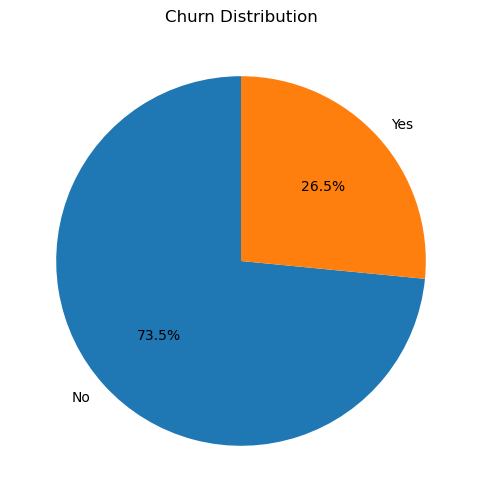

In [72]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Churn Distribution")
plt.ylabel('')
plt.show()

#### Internet Service bar plot

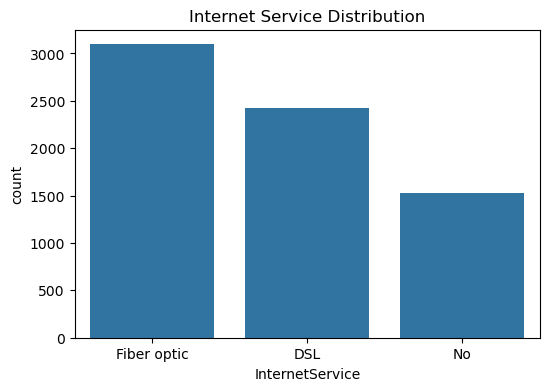

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', order=df['InternetService'].value_counts().index)
plt.title("Internet Service Distribution")
plt.show()

#### Payment Methods bar plot

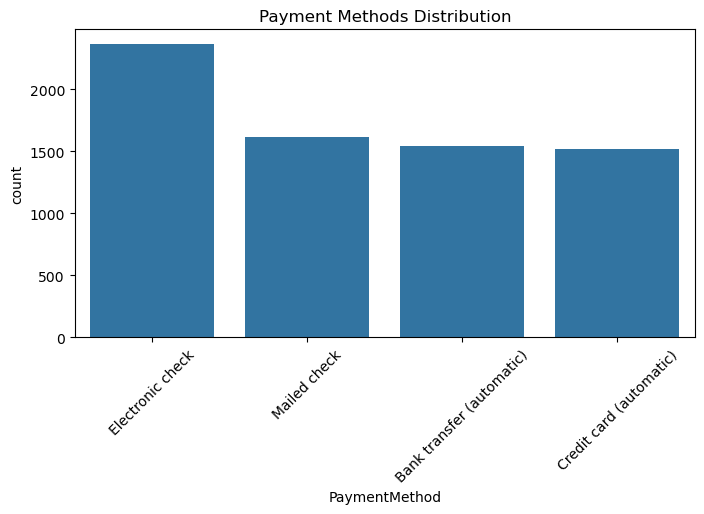

In [76]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='PaymentMethod', order=df['PaymentMethod'].value_counts().index)
plt.title("Payment Methods Distribution")
plt.xticks(rotation=45)
plt.show()

#### Contract Type bar plot

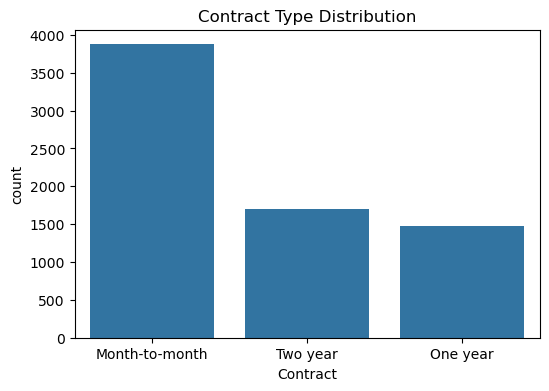

In [78]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', order=df['Contract'].value_counts().index)
plt.title("Contract Type Distribution")
plt.show()


#### Tenure Histogram

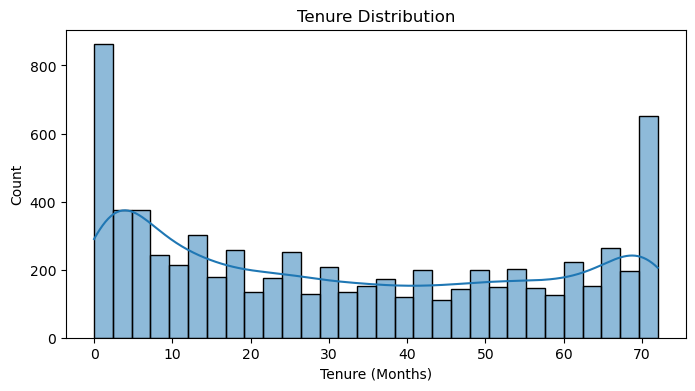

In [80]:
plt.figure(figsize=(8,4))
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.show()

#### Numeric boxplots by Churn

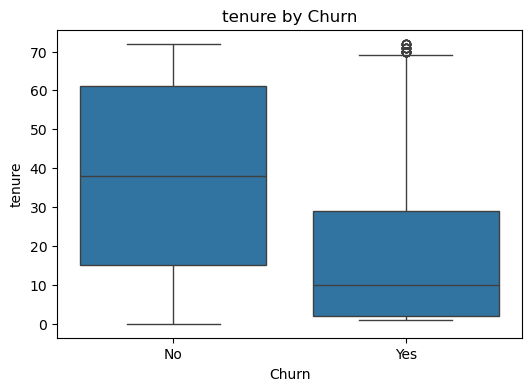

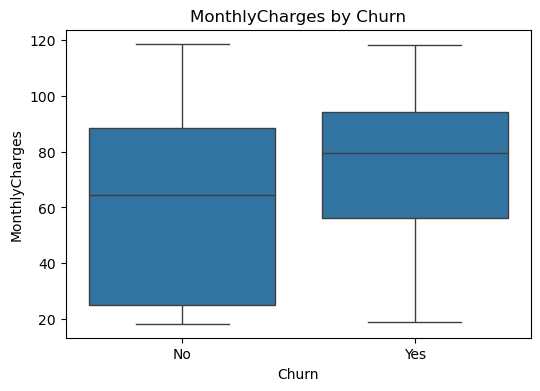

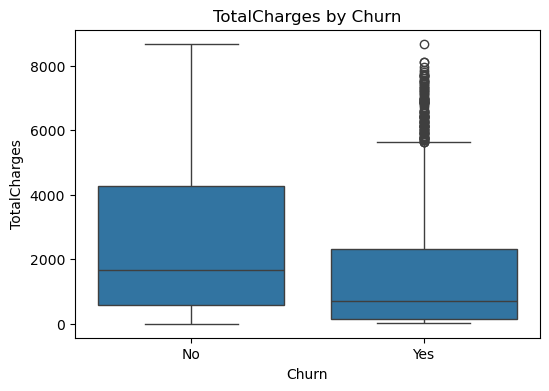

In [82]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f"{col} by Churn")
    plt.show()

#### Correlation heatmap

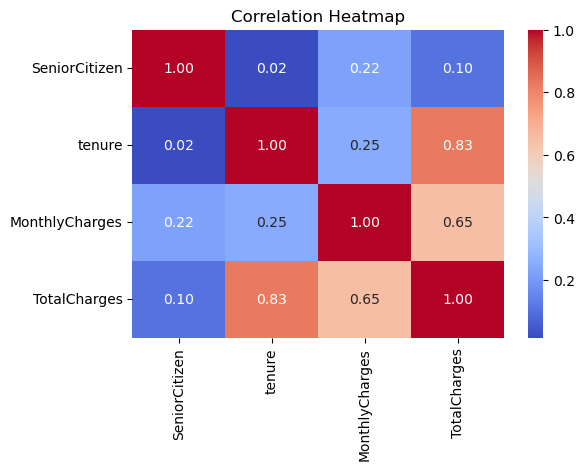

In [84]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Preparing data for data modeling

### Dropping unnecessory columns

#### Remove unique identifier

In [90]:
df.drop('customerID', axis=1, inplace=True)

In [93]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#### Converting categorical variables to numeric - Convert all object columns to numerical values.

In [96]:
df = pd.get_dummies(df, drop_first=True)

In [98]:
df.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSupport_Yes                             bool
StreamingTV_No inter

#### Splitting your data - Separate features (X) and target (y), then make training/testing splits

In [107]:
X = df.drop('Churn_Yes', axis=1)  # after one-hot encoding, 'Churn_Yes' becomes the target
y = df['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Handling class imbalance

In [110]:
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)


#### Scale numerical features

In [113]:
scaler = StandardScaler()
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train_bal[num_cols] = scaler.fit_transform(X_train_bal[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Machine Learning model

#### Random Forest Classifier

In [118]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

RandomForestClassifier(random_state=42)

#### Predictions

In [121]:
y_pred = rf.predict(X_test)

## Model Evaluation

In [123]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7913413768630234
Precision: 0.6076294277929155
Recall: 0.5978552278820375
F1 Score: 0.6027027027027027

Classification Report:
               precision    recall  f1-score   support

       False       0.86      0.86      0.86      1036
        True       0.61      0.60      0.60       373

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



## Final Report & Business Insights

Key findings:

The Random Forest model reliably predicts churn customers, as shown by strong performance metrics (e.g., F1 Score, Recall).

Features like tenure, contract type, monthly charges, and internet service type have high impact on churn prediction (you can check .feature_importances_ for more details).

Business Implications:

Long Tenure → Less likely to churn. Loyalty programs targeting new/short tenure customers could reduce churn.

Month-to-month contracts and high monthly charges → Increase likelihood of churn. Consider promoting longer-term contracts or offering discounts to such segments.

Fiber optic users churn more than DSL users: Look into customer experience for Fiber optic users.

### Feature importance

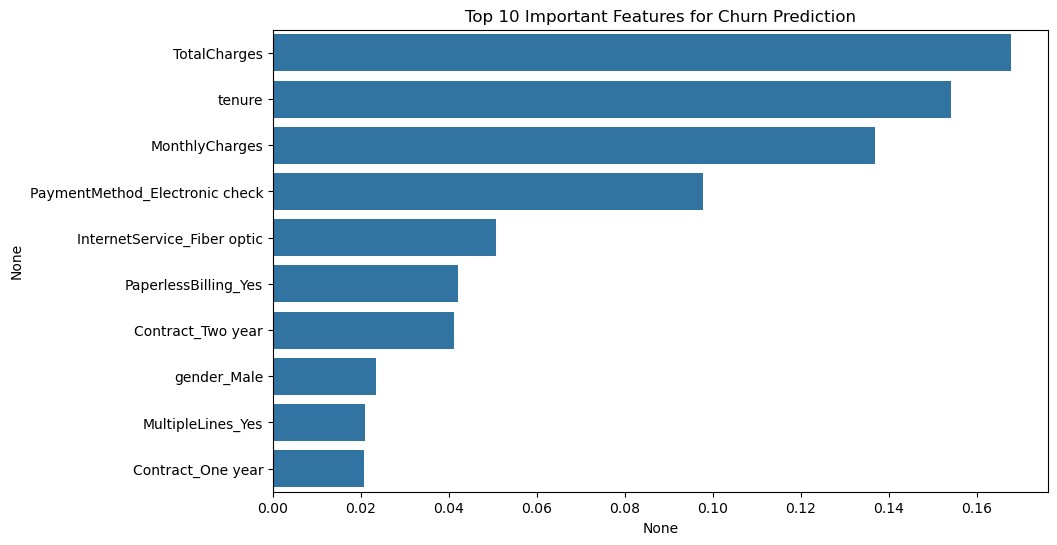

In [127]:
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Important Features for Churn Prediction")
plt.show()

## Conclusion

#### The predictive model successfully identifies customers who are likely to churn with high accuracy and balanced precision-recall metrics. By leveraging this insight, the telecommunications company can implement data-driven retention strategies, significantly reducing churn rates, improving user satisfaction, and increasing profitability.